# Tree Models in Machine Learning

**Compiled by: Ibrahim Alabi (Computing PhD, Data Science, Boise State University)**

## Learning Objectives

1. Understand the goals and main concepts of a Machine Learning Algorithm
2. Prepare a SnowEx dataset (InSAR) for Machine Learning
3. Understand the fundamental types of and techniques in Machine Learning
4. Implement Machine Learning (tree model) with a SnowEx dataset
5. Steps to deploy a Machine Learning Model

## What is Machine Learning?

Machine Learning simply means building algorithms or computer models using data. The goal is to use these "trained" computer models to make decisions. 

Here is a general definition;

> Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel, 1959).

Over the years, ML algorithms have achieved great success in a wide variety of fields. Today, we will build **tree models** that predicts total snow depth L-band products.

## Machine Learning Vs. Traditional Programming

Machine Learning (ML) and traditional programming are two different paradigms used to solve problems and create intelligent systems. The primary difference lies in how they are instructed to solve a problem.

### Task

Suppose we want to build an intelligent system that identifies whether a given number is even or odd. This intelligent system can be represented mathematically as:

$$y = f(x)$$

Where:

   * $x \to$ the number entered also called a feature
   * $y \to$ the outcome we want to predict
   * $f \to$ the model that gets the job done

### Traditional Programming Approach

In traditional programming, the programmer writes explicit rules (code) for the program to follow. The system follows these instructions exactly to produce a solution.

```
def check_even_odd(number):
    if number % 2 == 0:
        return "Even"
    else:
        return "Odd"

# Usage
result = check_even_odd(4)  # Output: Even
```

<img src="./Images/traditional_programming_flowchart.jpeg"  width= "500px">

### Machine Learning Approach

In Machine Learning, instead of writing explicit instructions, we provide a model with data and let it learn the patterns. The model, after training, can then make predictions or decisions based on what it has learned. 


<img src="./Images/ML_flowchart.jpeg"  width= "500px">

**Machine Learning is useful when the function cannot be programmed or the relationship between the features and outcome is unknown.**

## Predicting Total Snow Depth with L-band InSAR Products

Now we will import data from the 2017 SnowEx Airborne Campaign.

### Motivation 

Preparing the ground for the [NASA-ISRO (Indian Space Research Organisation)](https://nisar.jpl.nasa.gov/) (NISAR) mission. The NISAR satellite mission is slated to observe nearly all of Earth’s terrestrial and ice surfaces at ∼10 m resolution and with a revisit frequency of twice every 12 days. We want to show a potential way to analyze NISAR-like data when it becomes available in the future.

### Task

To predict total snow depth from L-band InSAR products.

In Machine Learning terminologies, the data contains the following features;

- unwrapped phase
- coherence
- vegetation height
- bare earth DEM
- incidence angle


and outcome

- snow depth

The goal is to use the data to learn the computer model $f$ so that

snow depth = $f$(phase, coherence, amplitude, incidence angle) 

Once $f$ is learned, it can be used to predict snow depth given the features.

## About the Data

Features are the observations from the Lband InSAR (UAVSAR) in 2017 over Grand Mesa.  Note that we are only using measurements from the airborne instrument flying at 40,000 ft above the ground (no other ground or aircraft data).

The output/response you are predicting is total snow depth from the airborne LiDAR survey around the same time in February 2017.  While UAVSAR should be more related to snow depth change, rather than total snow depth, we know that snow patterns can be consistent and so total snow depth (before melt starts) should be similar to snow depth change patterns.

You can read more about SAR and InSAR here: [link](https://www.earthdata.nasa.gov/learn/backgrounders/what-is-sar)

## Setup

Load libraries:

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning packages
from sklearn import set_config
from sklearn.model_selection import train_test_split

set_config(display='diagram', transform_output="pandas")

## Load Dataset

Note that this dataset has been cleaned in a separate notebook, and it is available for anyone interested.

In [30]:
dataset = pd.read_csv("./Data/insar_snowdepth.csv")
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   coherence        3000 non-null   float64
 1   incidence_angle  3000 non-null   float64
 2   bare_earth_dem   3000 non-null   float64
 3   vegetation_ht    3000 non-null   float64
 4   unwrapped_phase  3000 non-null   float64
 5   snow_depth       3000 non-null   float64
dtypes: float64(6)
memory usage: 140.8 KB


,coherence,incidence_angle,bare_earth_dem,vegetation_ht,unwrapped_phase,snow_depth
0,0.579178,0.948914,3048.159,0.000000,-7.692788,1.319504
1,0.564571,0.946893,3046.989,0.000000,-8.000650,1.216233
2,0.701721,1.001180,3063.148,0.000000,-7.641302,1.020432
3,0.431904,0.753452,2963.084,9.100586,-7.756969,1.146408
4,0.746369,0.872160,3015.573,0.000000,-8.423515,0.814133


## Train and Test Sets

For the algorithm to learn the relationship pattern between the feature(s) and the outcome variable, it has to be exposed to examples. The dataset containing the examples for training a learning machine is called the *train set* ($\mathcal{D}^{(tr)}$). 

On the other hand, the accuracy of an algorithm is measured on how well it predicts the outcome of observations it has not seen before. The dataset containing the observations not used in training the ML algorithm is called the *test set* ($\mathcal{D}^{(te)}$). 

In practice, we divide our dataset into train and test sets, train the algorithm on the train set and evaluate its performance on the test set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("snow_depth", axis=1),
    dataset["snow_depth"],
    test_size=0.2,
    random_state=42,
) # random_state is used to make sure that the split is always the same

### Inspect the Data

**Visualization**

Before modelling, it is always a good idea to visualize our dataset. With visualization, we gain insights into the relationships between the variables and the shape of the distribution of each variable. For this data, we shall look into the scatterplot matrix.

**Note:** spatial plots are available in the data cleaning notebook.

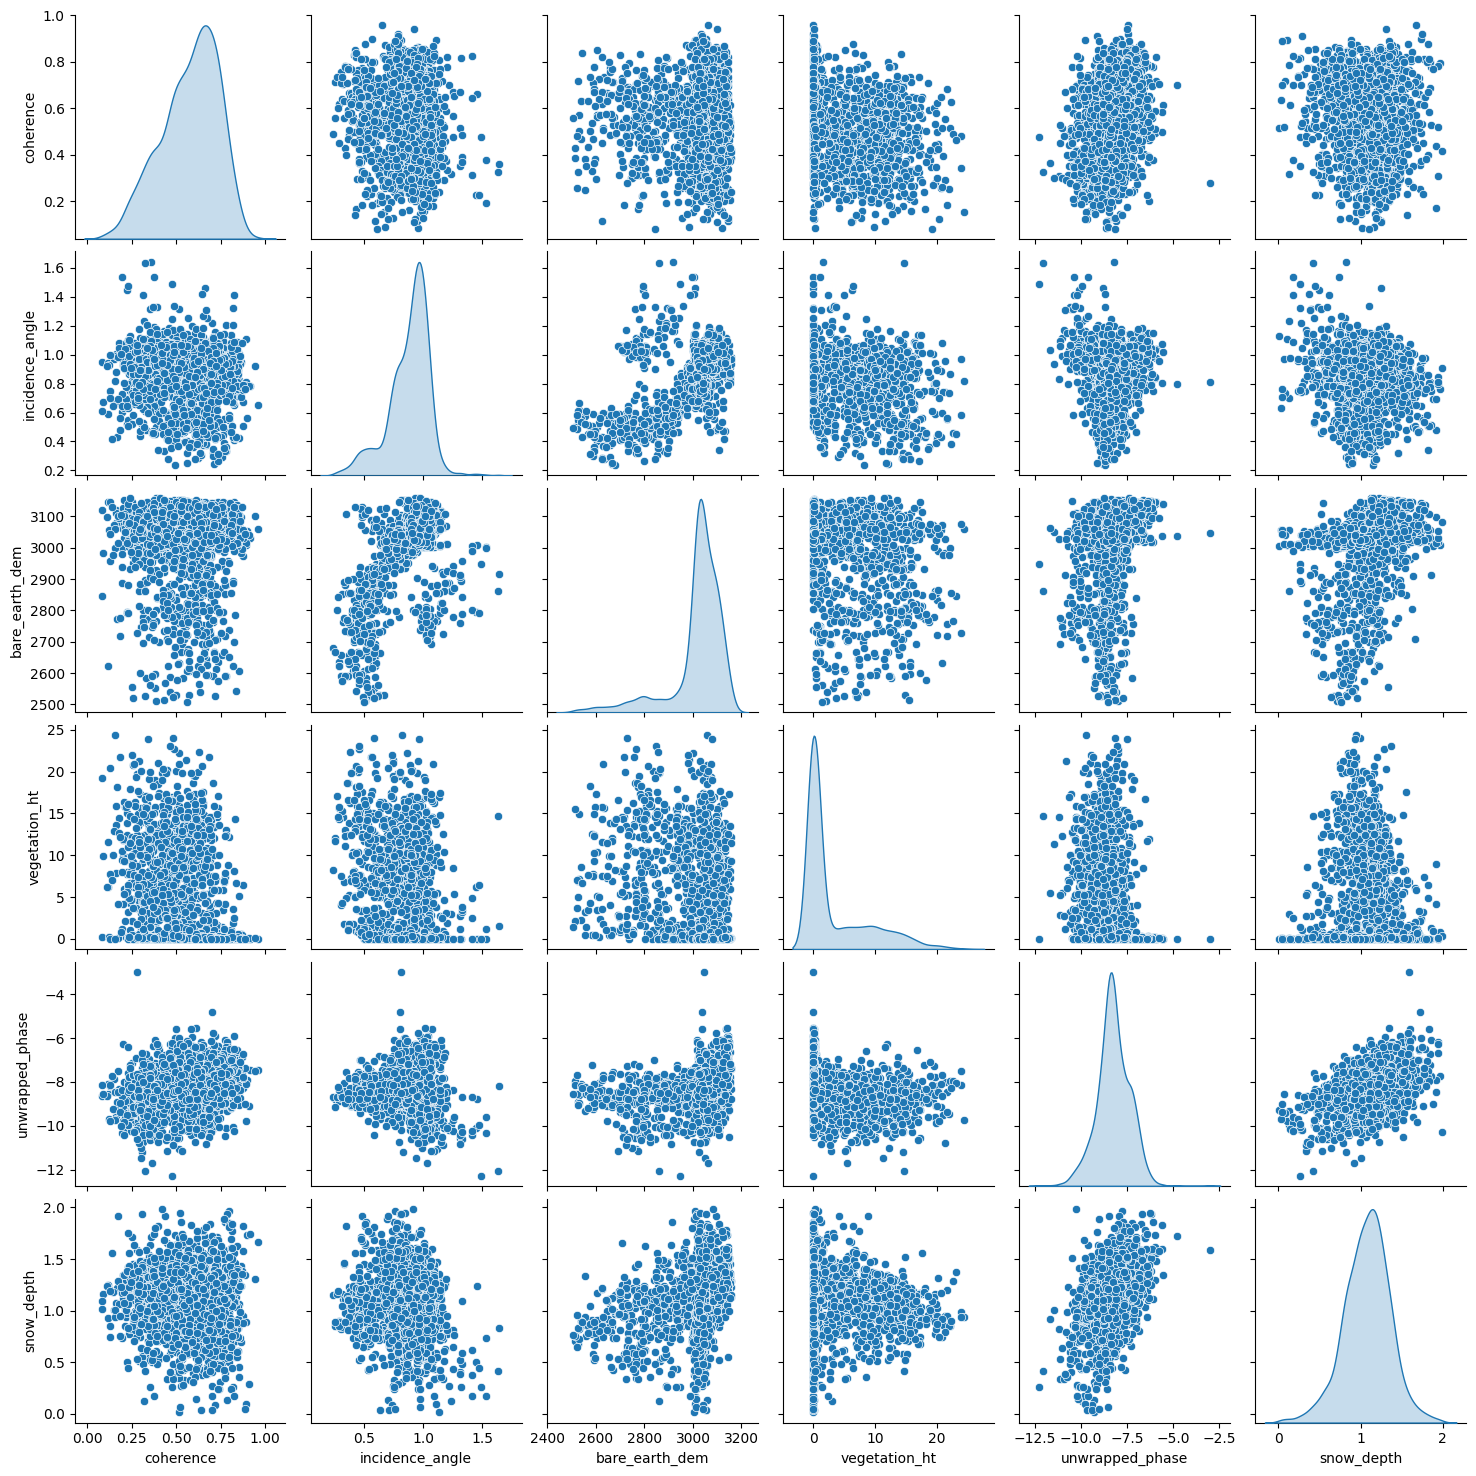

In [32]:
sns.pairplot(
    X_train.assign(snow_depth=y_train),
    diag_kind="kde",
);

Each panel (excluding the main diagonal) of the scatterplot matrix is a scatterplot for a pair of variables whose identities are given by the corresponding row and column labels. The main diagonal is density plot for each variable. None of the features have a linear relationship with *snow_depth*. This may indicate that a linear model might not be the best option.

**Descriptive Statistics**

- count: the size of the training set
- mean: arithmetic mean
- std: sample standard deviation
- min: minimum value
- 25%: 25% of the values fall below this number
- 50%: $50^{th}$ percentile also called the median. 50% of the values fall below this number and 50% of the values fall above this number
- 75%: 75% of the values fall below this number
- max: maximum value



In [33]:
X_train.assign(snow_depth=y_train).describe().T

,count,mean,std,min,25%,50%,75%,max
coherence,2400.0,0.574918,0.160508,0.083285,0.469890,0.599048,0.696409,0.959508
incidence_angle,2400.0,0.875300,0.175937,0.235626,0.784742,0.915966,0.991815,1.641741
bare_earth_dem,2400.0,3014.996586,111.025229,2507.174000,3011.551750,3034.403000,3081.089000,3157.122000
vegetation_ht,2400.0,3.352921,5.287417,0.000000,0.000000,0.168823,5.840820,24.351074
unwrapped_phase,2400.0,-8.246177,0.889763,-12.277428,-8.746127,-8.271425,-7.670407,-2.984939
snow_depth,2400.0,1.075451,0.281666,0.014328,0.902268,1.092575,1.255783,1.987961


## Feature Engineering

Feature engineering means different things to different data scientists. However, in this tutorial, we will define feature engineering as the art of manipulating and transforming data into a format that optimally represents the underlying problem.

More generally, feature engineering is the process of using your own knowledge about the data and about the machine learning algorithm at hand to make the algorithm work better by applying hardcoded (non-learned) transformations to the data before it goes into the model.

### Types of Feature Engineering

1. Feature improvement (normalization, missing value imputation, etc.): these techniques deal with augmenting existing structured features through various transformations.
2. Feature construction (creating new features from original data): these techniques deal with augmenting existing structured features through various transformations.
3. Feature selection (hypthesis testing, information gain from tree-based models): choosing the best set of features from existing ones to reduce the total number of features.
4. Feature extraction (e.g. bag of words).

**Note: Tree models do not require feature normalization/standardization.**

## Why Estimate $f$?

We estimate $f$ for two main reasons;

1. **Prediction**: in this case, the features $X$ are available, but there is no explicit rule for obtaining the outcome $y$.
2. **Inference**: in practice, we are sometimes interested in how changing the input $X$ effects $y$. Inference can tell us which features are significantly associated with a paticular outcome and the nature of the relationship between $X$ and $y$.

## How Do We Estimate $f$?

### Machine Learning Algorithms

Machine learning algorithms can be categorized based on different criteria. In this tutorial, our categorization will be based on the amount and type of supervision needed during the training process. Based on this criterion, there are four major categories; supervised learning, unsupervised learning, semisupervised learning, and reinforcement learning. We shall limit our definition to the first two;

* **Supervised Learning**: this refers to tasks where we have a specific outcome to predict. That is, every observation of the features has a corresponding outcome. An example of a supervised learning task is predicting snow depth based on some influencing features.
	 
* **Unsupervised Learning**: this refers to tasks where we have no outcome to predict.  Here, rather than predict an outcome, we seek to understand the relationship between the features or between the observations or to detect anomalous observations. Considering the example above, we assume the snow depth variable does not exist and we either understand the relationship between the features or between the observations based on the features.

It is worth noting that a variable can either be categorical or continuous. For now, let's focus on the nature of the **outcome variable**. In *Supervised Learning* parlance, if the outcome variable is categorical, we have a **classification** task and if continuous, we are in the presence of a **regression** task. Categorical implies that the variable is made of distinct categories (e.g. hair color: grey, blonde, black) and continuous implies that the variable is measured (e.g. snow depth). For the rest of this tutorial, we will focus on **Supervised Learning** tasks with a special concentration on regression tasks.

Most Machine Learning techniques can be characterised as either *parametric* or *non-parametric*. 

**Parametric:** The parametric approach simplifies the problem of estimating $f$ to a parameter estimation problem. The disadvantage is that we assume a particular shape of $f$ that may not match the true shape of $f$. The major advantage of using parametric approach that when inference is the goal we can understand how changing $X_1, X_2, \cdots, X_k$ effects $Y$. A common parametric method is the Linear Regression.

**Non-parametric:** Non-parametric approaches do not assume any shape for $f$. Instead, they try to estimate $f$ that gets as close to the data points as possible. The disadvantage of non-parametric approaches is that they may require extensive training observations to estimate $f$ accurately. Common examples of non-parametric methods are the tree models.

## Tree Models

Tree models are machine learning algorithms that use tree-based graph structures to predict an output by learning simple decision rules inferred from the features. When we use decision trees for regression tasks, we call them **regression trees**; when we use decision trees for classification tasks, we call them **classification trees**. Subsequently, we use “regression trees” instead of “decision trees” because we will solve a regression problem in this tutorial.

### Regression Trees

Consider a dataset $\mathcal{D}_n = \left\lbrace (\textbf{x}_1, y_1), (\textbf{x}_2, y_2), \cdots, (\textbf{x}_n, y_n) \right\rbrace$ where $\textbf{x}_i^\top \equiv ({x}_{i1}, {x}_{i2}, \cdots, {x}_{ik})$ denotes the $k$-dimensional vector of features, and $y_i$ represents the corresponding outcome (continuous in this case).

The fundamental concept underlying regression trees is to split the feature space (set of possible values for the features) into two sub-regions. The sub-regions are further divided into two until a stopping criterion is reached. The predicted value of a given observation is the arithmetic mean of the training observations in the region it belongs.

## Performance Evaluation

Each time we estimate the true outcome ($y$) using a trained ML algorithm ($f(\textbf{x})$), the discrepancy between the observed and predicted must be quantified. The question is, how do we quantify this discrepancy? This brings the notion of **loss function**. 

*Loss Function* $\mathcal{L} (\cdot,\cdot)$ is a bivariate function that quantifies the loss (error) we sustain from predicting $y$ with $f(\textbf{x})$. Put another way, **loss function** quantifies how close the prediction $f(\textbf{x})$ is to the ground truth $y$.

* Regression Loss Function

There exists quite a number of ways for which the loss of a regression problem may be quantified. We now illustrate two of them;

1. 

$$
\mathcal{L} (y,f(\textbf{x})) = (y - f(\textbf{x}))^2
$$

This is popularly known as the **squared error loss** and it is simply the square of the difference between the observed and the predicted values. The loss is squared so that the function reaches its minimum (convex).

2.

$$
\mathcal{L} (y,f(\textbf{x})) = |y - f(\textbf{x})|
$$

Another way to quantify regression loss is by taking the absolute value of the difference between the observed ($y$) and the predicted ($f(\textbf{x})$) values. This is called the $L_1$ loss.

It is worth noting that the *loss function* as defined above corresponds to a single observation. However, in practice, we want to quantify the loss over the entire dataset and this is where the notion of **empirical risk** comes in. Loss quantified over the entire dataset is called the *empirical risk*. Our goal in ML is to develop an algorithm such that the *empirical risk* is as minimum as possible. *Empirical risk* is also called the *cost function* or the *objective function* we want to minimize.

* Regression Empirical Risk

$$
\widehat{\mathcal{R}}_n(f) = \frac{1}{n}\sum_{i=1}^n{\mathcal{L}(y_i, \textbf{x}_i)}
$$

The empirical risk corresponding to the squared error loss is called "mean squared error", while the empirical risk corresponding to the L1 loss is called "mean absolute error". Other Regression Loss functions can be found at [Keras: losses](https://keras.io/api/losses/).

### Regression Tree in Practice

The sklearn documentation for regression tree can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [34]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree

In [35]:
tree = DecisionTreeRegressor(random_state=0, max_depth=2)  ## random_state=0 for reproducible results
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

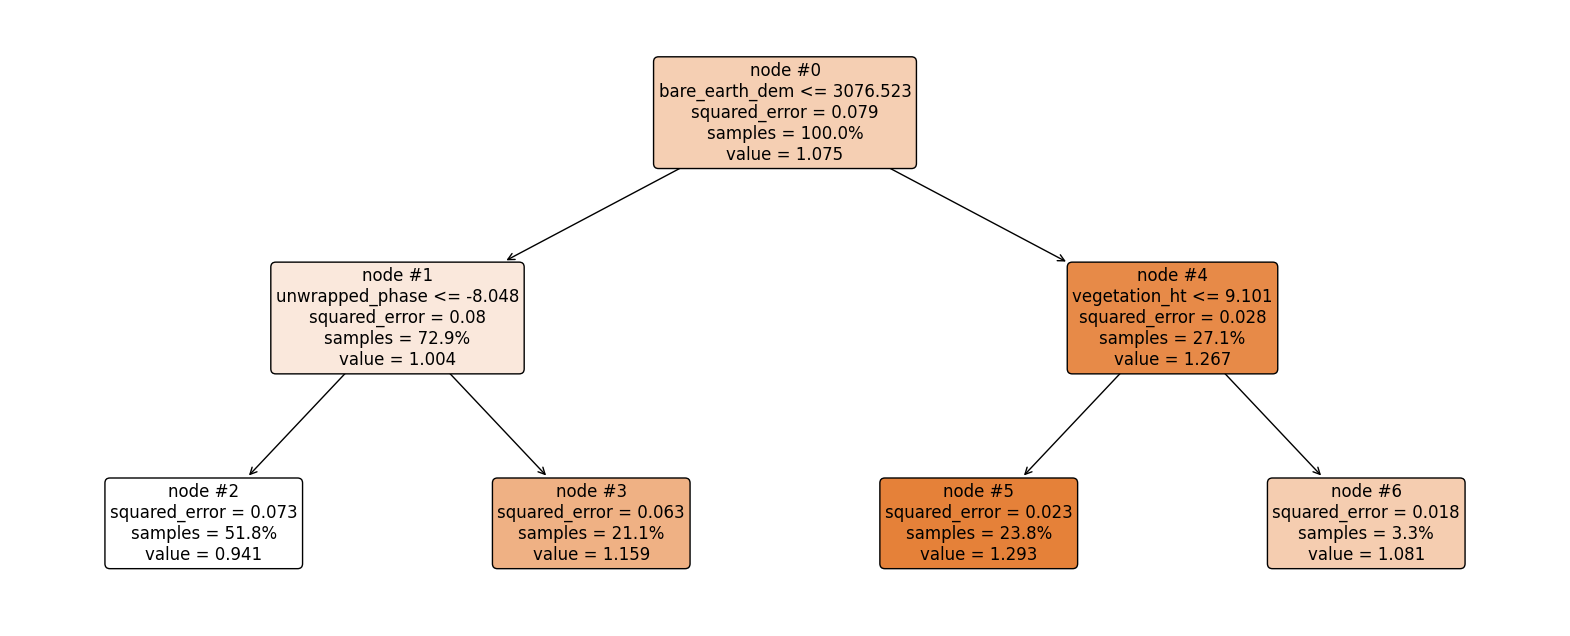

In [36]:
features = list(X_train.columns)

plt.figure(figsize = (20, 8))
plot_tree(tree, 
          filled = True, 
          fontsize = 12,
          node_ids = True,
          rounded = True,
          proportion=True,
         feature_names= features)
plt.show()

### Now let's explain the regression tree above

The root node (node #0) assigns values of **bare_eart_dem** lesser than or equal to 3076.523 to the right branch and values of **bare_eart_dem** greater than 3076.523 to the left node. Observations with **bare_eart_dem** lesser than or equal to 3076.523 are further partitioned based on **unwrapped_phase** values. Overall, the regression tree splits the observations into four disjoint groups or regions ($R_i$) of the feature space.

<img src="./Images/tree_explanation.png"  width= "500px">


where $\hat{y}_{R_i}$ is the mean of the respective regions. The regions $R_i, \ i = 1,2,3, 4$ are called **terminal nodes** or **leaves**, the points where the feature space ($\textbf{x}$) is partitioned are called **internal nodes** and the line segments connecting the nodes are referred to as **branches**. Generally, to know which region an observation belongs to, we ask series of question(s) starting from the root node until we get to the terminal node and the value predicted for the observation is mean of all training observations in that region. Mathematically we write;

 \begin{equation}
 \hat{y} = \hat{f}(\text{x}) = \frac{1}{|R_j|} \sum_{i = 1}^{n} y_i 1(\text{x}_i \in R_j). 
 \end{equation}

 Here, if the $i^{th}$ observation belongs to region $R_j$, the indicator function equals 1, else, it equals zero.

* Root node: node #0.
* Internal nodes: node #1 and node #4.
* Terminal nodes: node #2, node #3, node #5, and node #6.

#### How do we construct the regions?

We have mentioned the recursive splitting of observations into regions, the natural question that comes to mind is, how do we construct the regions? Our goal is to find regions such that the expected loss is minimized. To perform the recursive binary splitting, we consider all features in the feature space and all possible cut-point(s) for the individual features. The feature and cut-point leading to the greatest reduction in expected loss are chosen for splitting. This process is then continued until a stopping criterion is reached. A stopping criterion could be until no region contains more than five observations. In sklearn, the stopping criterion is controlled by `max_depth` and `min_samples_split`.

## How to make predictions

An example:

In [37]:
sample= X_train.sample(1, random_state=42)
sample

,coherence,incidence_angle,bare_earth_dem,vegetation_ht,unwrapped_phase
1705,0.334815,0.948335,3086.18,5.094482,-7.708499


In [38]:
tree.predict(sample)

array([1.29318053])

* bare earth DEM is greater than 3076.523 and vegetation height is lesser than 9.101. This falls in region one ($R_3$), and our prediction will be 1.293.

### Feature Importance

The total amount by which the empirical risk is decreased due to splits over a given predictor is documented. The larger the value, the more important the variable. [Sklearn's](https://scikit-learn.org/stable/) implementation of variable importance normalizes the variable importance so that they add up to 1. Mathematically, feature importance is computed as:

$$I_j= \sum_j w_jC_j - w_{left(j)}C_{left(j)} - w_{right(j)}C_{right(j)}$$

* $I_j$= importance of variable $j$
* $C_j$= the MSE of node $j$ 
* $w_j$= percentage of the observation reaching node $j$

In [39]:
## compute bare_earth_dem importance

imp_bare_earth_dem=0.079 - (0.729*0.08) - (0.271*0.028)


print("Importance of bare_earth_dem: ", round(imp_bare_earth_dem, 3))

Importance of bare_earth_dem:  0.013


In [40]:
feature_impotanceRT = pd.DataFrame({
    'Unormalized Importance': tree.tree_.compute_feature_importances(normalize=False),
    'Normalized Importance': tree.feature_importances_
}, index=features)
feature_impotanceRT


,Unormalized Importance,Normalized Importance
coherence,0.000000,0.000000
incidence_angle,0.000000,0.000000
bare_earth_dem,0.013637,0.617676
vegetation_ht,0.001316,0.059610
unwrapped_phase,0.007125,0.322714


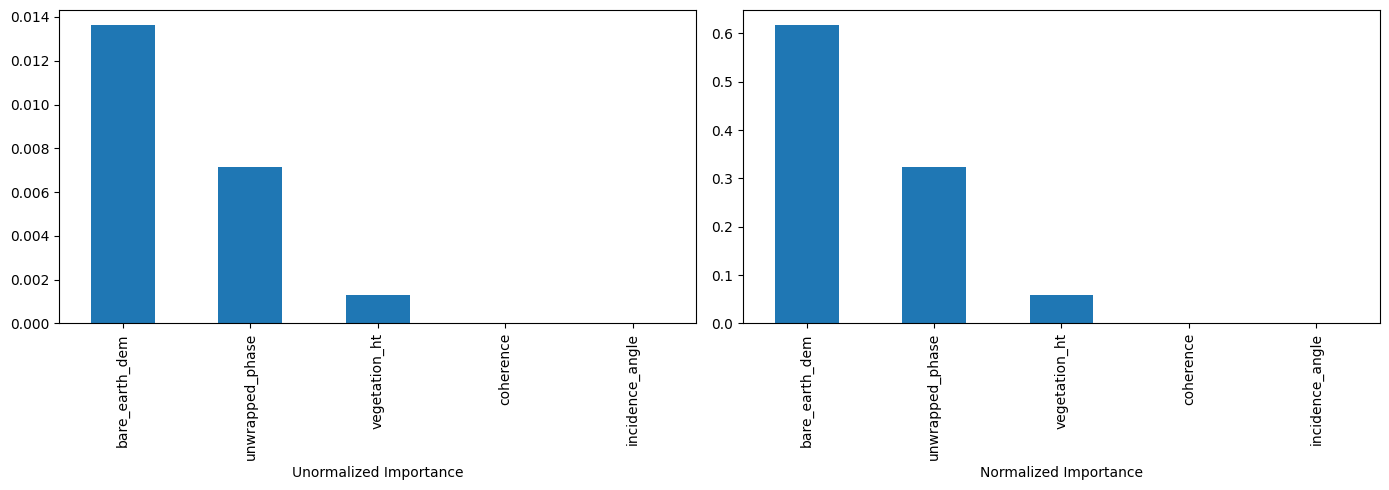

In [41]:
#plot feature importance (sorted by unnormalized importance)

feature_impotanceRT.sort_values(by="Unormalized Importance", ascending=False, inplace=True)

plt.subplot(1, 2, 1)
feature_impotanceRT["Unormalized Importance"].plot.bar(figsize=(14, 5))
plt.xlabel("Unormalized Importance")

plt.subplot(1, 2, 2)
feature_impotanceRT["Normalized Importance"].plot.bar(figsize=(14, 5))
plt.xlabel("Normalized Importance")

plt.tight_layout()
plt.show()

### Exercise:

Compute the normalized importance manually and compare it with sklearn's output above.

## Ensembles

An ensemble model is a machine learning technique that combines the predictions from multiple models in order to produce a single, more accurate and robust prediction. The main idea behind ensembles is that by aggregating predictions from multiple models, the individual weaknesses, biases, and variances of each model can be mitigated/averaged out, leading to a better overall performance.

### Why Ensemble Models Work:

1. Diversity: Different models capture different patterns and nuances in the data. By combining them, you can capture a wider range of patterns and reduce the chance of missing out on certain insights.

2. Reduction of Overfitting: Individual models, especially complex ones, might overfit to the training data. By averaging or voting, the overfitting tendencies of individual models can be neutralized.

3. Reduction of Variance: The combined predictions from multiple models can lead to reduced variance, especially if the individual models have uncorrelated errors.

4. Error Compensation: If different models make different errors on the same data points, these errors can offset each other when predictions are aggregated, leading to a more accurate combined prediction.

### Common Ensemble Techniques

1. Bagging: Involves training multiple instances of the same model on different subsets of the training data (e.g., Random Forests).

2. Boosting: Iteratively trains models where each new model attempts to correct the errors of the combined ensemble of existing models (e.g., AdaBoost, Gradient Boosting).

3. Stacking: Uses predictions from multiple models as inputs into another model (the "meta-learner") to make the final prediction.

## Random Forest

> If you want to go fast, go alone. If you want to go far, go together (African Proverb).

Regression trees suffer from high variance, that is, they have a habit of overfitting the training observations. A straightforward way to reduce the variance is to employ the Random Forest (RF) algorithm. RF is an ensemble learning technique that can be used for both classification and regression.  

* **Bagging:** Bagging consists of two words; Bootstrap and Aggregation. Bootstrap is a popular resampling technique where random sub-samples (with replacement) are created from the training data. The individual bootstrapped sub-sample is called a “Bag.” Aggregation, however, means combining the results from machines trained on the respective bags. We could say, given our training data, we generate $B$ bootstrapped training sub-samples from the original training data, then we train an algorithm on the respective bootstrapped sub-sample to obtain $\hat{f}^1 (\text{x}), \hat{f}^2 (\text{x}), \cdots , \hat{f}^B (\text{x})$. The final predicted value is the average of all the individual predictions and it is given by:
\begin{equation}
\hat{f}_{\text{bag}} (\text{x}) = \frac{1}{B} \sum_{b = 1}^{B} \hat{f}^{b} (\text{x}).
\end{equation}

This is bagging! In the RF algorithm, regression trees are built on the different bootstrapped samples and the result is a forest of regression trees, hence the "forest" in Random Forest. 

* **What makes the forest random?**

Recall that when training a regression tree, splitting is done at each internal node, however, in the RF algorithm, when building the individual regression trees, only a random sample of the total features is considered for optimal splitting and this is what makes the forest random! In essence, when we combine bagging with random feature selection at each internal node of the constituting regression trees, we are said to have constructed a **Random Forest** learning machine.

### Training Random Forest

Sklearn's documentation for Random Forest Regression can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor(n_estimators=2,max_depth=2,random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=2, random_state=0)

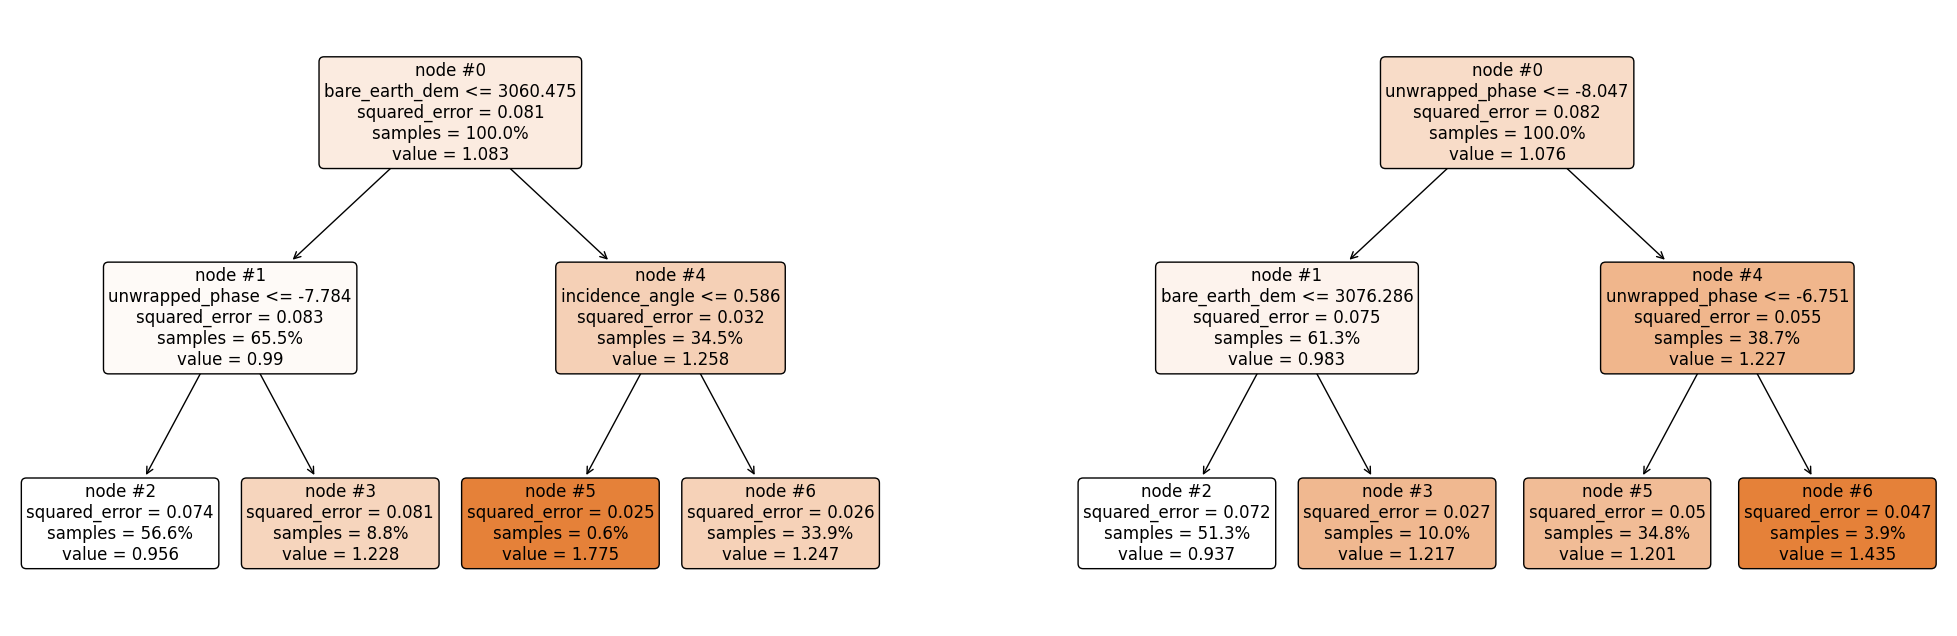

In [44]:
plt.figure(figsize = (25, 8))

plt.subplot(121)
plot_tree(rf.estimators_[0], 
          filled = True, 
          fontsize = 12,
          node_ids = True,
          rounded = True,
          proportion=True, 
         feature_names= features)

plt.subplot(122)
plot_tree(rf.estimators_[1], 
          filled = True, 
          fontsize = 12,
          node_ids = True,
          rounded = True,
          proportion=True, 
         feature_names= features)

plt.show()

### Making Predictions

In [45]:
sample

,coherence,incidence_angle,bare_earth_dem,vegetation_ht,unwrapped_phase
1705,0.334815,0.948335,3086.18,5.094482,-7.708499


In [46]:
## Overall predictions

rf.predict(sample)

array([1.22401209])

In [47]:
## Prediction from the first tree

rf.estimators_[0].predict(sample.values)

array([1.2474622])

In [48]:
## Prediction from the second tree

rf.estimators_[1].predict(sample.values)

array([1.20056198])

Using the same approach as above, the first regression tree predicts 0.7072, and the second regression tree predicts 0.7065. Hence, the final prediction is;

$$\frac{1.2474622+1.20056198}{2} = 1.22401209$$

### Feature Importance

The total amount by which the squared error loss is decreased due to splits over a given predictor is documented and averaged over all trees in the forest. The larger the value, the more important the variable.

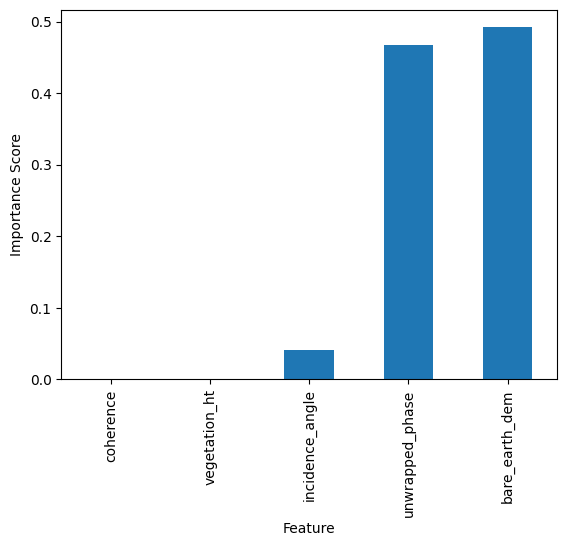

In [49]:
feature_impotanceRF = pd.Series(rf.feature_importances_, index=features)
feature_impotanceRF.sort_values().plot(kind = 'bar')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

### Exercise:

Compute the random forest's normalized importance manually and compare it with sklearn's output above.

### Putting it all together

We'll use Sklearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to preprocess and fit our model in one shot.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


In [51]:
rf_pipe = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor())
])

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('regressor', RandomForestRegressor())])

### Main Challenges of Machine Learning

1. Bad Data (insufficient training data, nonrepresentative training data, irrelevant features).
2. Bad Algorithm (overfitting the training the data, underfitting the training data).

Hyperparameter tuning is one way to improve our model.

### Hyperparameter Optimization

Hyperameters are parameters that are a step above other model parameters because their values have to be specified before fitting the model. They are not learned during the training process. In practice, different values are often "tuned" to obtain the optimal value, called hyperparameter optimization. Hyperparameter optimization is often done via a cross-validation (CV) or validation set approach. 

* In the validation set approach, we hold out a portion of the training set and use the held-out portion to test the performance of different hyperparameters.
* Cross-validation: the training data is divided into *k* disjoint sets. The idea is to use one of the k folds as test set and the remaining k − 1 folds as training set. The algorithm then changes the test set until every fold has served as test set. Performance metric is computed at each iteration and averaged in the end.Sklearn's implementation of grid search cross validation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).


<img src="./Images/cross_validation.png"  width= "500px">

Image Source [Machine Learning Bookcamp](https://www.manning.com/books/machine-learning-bookcamp?query=machine)

In [52]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'regressor__min_samples_split': [2,3],
                  'regressor__n_estimators': [200, 100], 
                  'regressor__max_depth': [None, 5]}

rf_pipeline_CV = GridSearchCV(rf_pipe, parameter_grid, verbose=1, cv=3) ## set njobs = -1 to use all processors. cv defaults to 5
rf_pipeline_CV.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Scaler', MinMaxScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 5],
                         'regressor__min_samples_split': [2, 3],
                         'regressor__n_estimators': [200, 100]},
             verbose=1)

In [53]:
print('Best Parameters are: {}'.format(rf_pipeline_CV.best_params_))

Best Parameters are: {'regressor__max_depth': None, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 200}


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
pred_before_tuning = rf_pipe.predict(X_test)
pred_after_tuning = rf_pipeline_CV.predict(X_test)

print('RMSE before tuning: {}'.format(round(mean_squared_error(y_test, pred_before_tuning, squared=False), 4)))
print('RMSE after tuning: {}'.format(round(mean_squared_error(y_test, pred_after_tuning, squared=False), 4)))

RMSE before tuning: 0.1937
RMSE after tuning: 0.1932


## Deploying Machine Learning Models

Now, our model lives in a Jupyter Notebook. Once we close our Jupyter Notebook or restart our kernel, the model disappears. How do we take our model out of our Jupyter Notebook? Model deployment is mainly concerned with putting optimal models into use/production. Steps for deploying our machine learning models:

1. Save the model (e.g. using pickle)
2. Serve the model: this is the process of making the model available to others. This is usually done using web services. A simple way to to implement a web service in Python is to use [Flask](https://flask.palletsprojects.com/en/2.1.x/).
3. Deployment: We don't run production services on personal machines, we need special services for that. Sample services include; Amazon Web Services, Google Cloud, Microsoft Azure, and Digital Ocean. These services are used to deploy a web service.

Other approaches for model deployments are:

* TensorFlow Lite: TensorFlow Lite is a lightweight alternative to “full” TensorFlow. It is a serverless approach that makes deploying models with AWS Lambda faster and simpler.
* Kubernetes: it is a powerful but uneasy tool for model deployment. More information can be found [here](https://kubernetes.io/).

* Save and load RF model

In [56]:
import pickle

f_out = open('SWE_Prediction_RF.bin', 'wb')
pickle.dump(rf_pipe, f_out)
f_out.close()


## To load model, use;
f_in=open('SWE_Prediction_RF.bin', 'rb')
reloaded_rf = pickle.load(f_in)
f_in.close()

### The Machine Learning Pipeline

1. Define the problem.
2. Obtain a representative dataset.
3. Feature engineering.
4. Model selection and training.
5. Model deployment and evaluation: watch out for **concept drift** (when our interpretation of the data changes) and **data drift** (when the underlying distributions of our data change).

## Your Turn 

Using the same dataset, perform hyperparameter optimization for a range of more comprehensive hyperparameter values and compare the performance of the two models.

## Acknowledgements

* Many thanks to e-Science institute and all organizing members for allowing me deploy/presenting this tutorial. A huge thanks to them for supporting my travel to Seattle.
* Many thanks to HP Marshall (my advisor) for allowing me present this tutorial and also suppoerting my travel. 

## Reference

1. [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning)
2. [A Taxonomy of Big Data for Optimal Predictive Machine Learning and Data Mining by Ernest Fokoue](https://arxiv.org/abs/1501.00604)
3. [An Introduction to Statistical Learning with Applications in R](https://link.springer.com/book/10.1007%2F978-1-4614-7138-7) (available online for free)
4. [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)
5. [MIT 6.S191: Introduction to Deep Learning](https://www.youtube.com/channel/UCtslD4DGH6PKyG_1gFAX7sg)
6. [Intro to Deep Learning (ML Tech Talks)](https://www.youtube.com/watch?v=AhE8RhPGH1A&t=2685s)
7. [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)
8. [Machine Learning Bookcamp](https://www.manning.com/books/machine-learning-bookcamp?query=machine)
9. [Feature Engineering Bookcamp](https://www.manning.com/books/feature-engineering-bookcamp)